In [7]:
#数据加载
import pandas as pd

train=pd.read_csv('train.csv')
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [8]:
#转化为pandas中的日期类型
train['Datetime']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')#d-day m-month Y-year H-hour M-minute
train#日期已经按照格式转换过来了

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [9]:
#将Datetime作为train的索引
train.index=train.Datetime
print("将Datetime设置为索引：")
print(train)
print("\n去掉ID，Datetime")
train.drop(['ID','Datetime'],axis=1,inplace=True)
print(train)

将Datetime设置为索引：
                        ID            Datetime  Count
Datetime                                             
2012-08-25 00:00:00      0 2012-08-25 00:00:00      8
2012-08-25 01:00:00      1 2012-08-25 01:00:00      2
2012-08-25 02:00:00      2 2012-08-25 02:00:00      6
2012-08-25 03:00:00      3 2012-08-25 03:00:00      2
2012-08-25 04:00:00      4 2012-08-25 04:00:00      2
...                    ...                 ...    ...
2014-09-25 19:00:00  18283 2014-09-25 19:00:00    868
2014-09-25 20:00:00  18284 2014-09-25 20:00:00    732
2014-09-25 21:00:00  18285 2014-09-25 21:00:00    702
2014-09-25 22:00:00  18286 2014-09-25 22:00:00    580
2014-09-25 23:00:00  18287 2014-09-25 23:00:00    534

[18288 rows x 3 columns]

去掉ID，Datetime
                     Count
Datetime                  
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2
...                    ...
2014-09-25 19:00:00    86

In [10]:
#按照天进行采样
daily_train=train.resample('D').sum()
daily_train.head()

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [11]:
daily_train['ds']=daily_train.index
daily_train['y']=daily_train['Count']
daily_train.drop(['Count'],axis=1,inplace=True)
daily_train.head()

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60


In [12]:
from fbprophet import Prophet
#拟合Prophet模型
m=Prophet(yearly_seasonality=True,seasonality_prior_scale=0.1)
m.fit(daily_train)#喂进去历史数据
#预测未来7个月，213天
future=m.make_future_dataframe(periods=213)#在历史数据上进行延展
forecast=m.predict(future)#对future(历史+未来)进行预测
forecast#看一下数据结果

INFO:numexpr.utils:Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-687.216303,-2338.152079,60.418115,-687.216303,-687.216303,-423.576256,-423.576256,-423.576256,-994.383343,-994.383343,-994.383343,570.807087,570.807087,570.807087,0.0,0.0,0.0,-1110.792559
1,2012-08-26,-679.114521,-2413.416857,-97.139786,-679.114521,-679.114521,-581.486251,-581.486251,-581.486251,-1143.350685,-1143.350685,-1143.350685,561.864434,561.864434,561.864434,0.0,0.0,0.0,-1260.600772
2,2012-08-27,-671.012739,-893.054513,1482.814872,-671.012739,-671.012739,1007.308260,1007.308260,1007.308260,457.250478,457.250478,457.250478,550.057783,550.057783,550.057783,0.0,0.0,0.0,336.295522
3,2012-08-28,-662.910957,-741.201918,1628.715158,-662.910957,-662.910957,1144.106545,1144.106545,1144.106545,607.909678,607.909678,607.909678,536.196867,536.196867,536.196867,0.0,0.0,0.0,481.195589
4,2012-08-29,-654.809174,-771.633055,1595.508319,-654.809174,-654.809174,1077.587083,1077.587083,1077.587083,556.476625,556.476625,556.476625,521.110459,521.110459,521.110459,0.0,0.0,0.0,422.777909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2015-04-22,16251.283611,15264.337129,17793.826211,15851.389268,16611.950055,297.105356,297.105356,297.105356,556.476625,556.476625,556.476625,-259.371269,-259.371269,-259.371269,0.0,0.0,0.0,16548.388967
971,2015-04-23,16278.812096,14960.349509,17592.338213,15876.355232,16641.609600,64.225516,64.225516,64.225516,360.102667,360.102667,360.102667,-295.877151,-295.877151,-295.877151,0.0,0.0,0.0,16343.037613
972,2015-04-24,16306.340581,14870.046425,17304.635688,15900.453973,16671.269144,-181.012341,-181.012341,-181.012341,155.994580,155.994580,155.994580,-337.006921,-337.006921,-337.006921,0.0,0.0,0.0,16125.328240
973,2015-04-25,16333.869066,13685.192361,16156.176116,15925.722356,16700.928689,-1376.368599,-1376.368599,-1376.368599,-994.383343,-994.383343,-994.383343,-381.985256,-381.985256,-381.985256,0.0,0.0,0.0,14957.500467


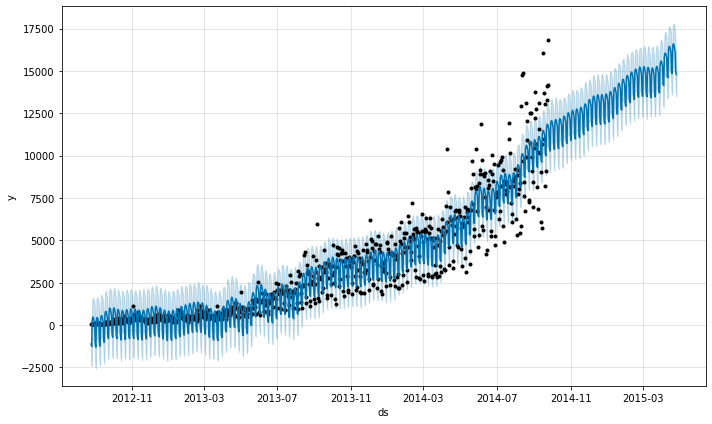

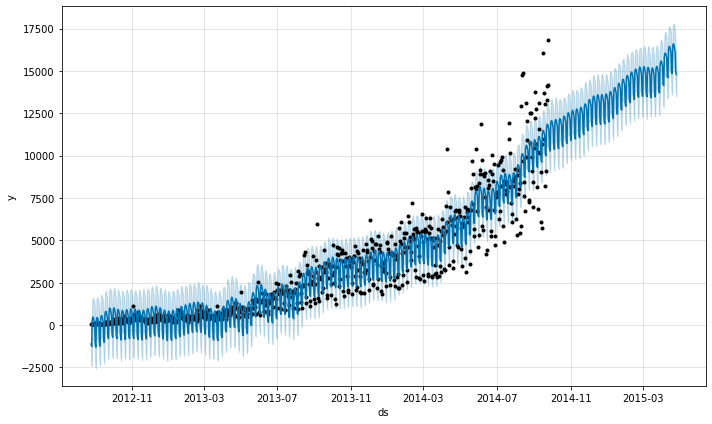

In [13]:
m.plot(forecast)#model里面自带了一个可视化工具plot 